##IMPORTS OF ALL THE LIBRARIES

In [1]:
# imports
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import pandas as pd  # Importing pandas for data manipulation
from google.colab import drive  # Importing drive from google.colab to access files from Google Drive
import seaborn as sns  # Importing seaborn for advanced data visualization

##Mounting of Google Drive,definition of Data Path and Data Frame

In [3]:
# Mount Google Drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/dataset.csv'
df = pd.read_csv(dataset_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Check of the correct loading of the dataset

In [4]:
#The command df.head() is used to display the first few rows of a DataFrame in pandas.
df.head()

,Name,Type,Mileage,Year,Condition,Price
0,Audi A3,45 TFSI e S Line Competition 5dr S Tronic,2.961,2023,Hybrid,38.49
1,Audi S3,S3 TFSI Quattro 5dr S Tronic,5.898,2023,Petrol,37.99
2,Audi A3,35 TDI S Line 5dr S Tronic,5.310,2023,Diesel,28.99
3,Audi Q3,45 TFSI e S Line 5dr S Tronic,3.950,2023,Hybrid,41.99
4,Audi Q3,40 TFSI Quattro Edition 1 5dr S Tronic,21.236,2020,Petrol,33.49


# Filtering null values



in the dataset, NaN (Not a Number) values represent missing or undefined data.

In [5]:
# Calculate the number of NaN (missing) values in each column
nan_values = df.isna().sum()

# Print the number of NaN values in each column
print("NaN values in each column:")
print(nan_values)


NaN values in each column:
Name           0
Type           0
Mileage        0
Year           0
Condition      0
Price        351
dtype: int64


Removing NaN values also allows us to perform statistical calculations and visualizations more effectively, enabling us to derive meaningful insights from the dataset.

In [6]:
# Drop rows with NaN (missing) values from the DataFrame
df = df.dropna()

# Data Visualization

## Basic information about the data

* **Name** - string
* **Type** - string
* **Mileage** - integer
* **Year** - integer
* **Condition** - category, e{Hybrid, Petrol, Diesel, Electric}
* **Price** - float

In [7]:
print(f'There are {len(df["Name"].unique())} unique car names.')
print(f'There are {len(df["Type"].unique())} unique car types.')

There are 52 unique car names.
There are 625 unique car types.


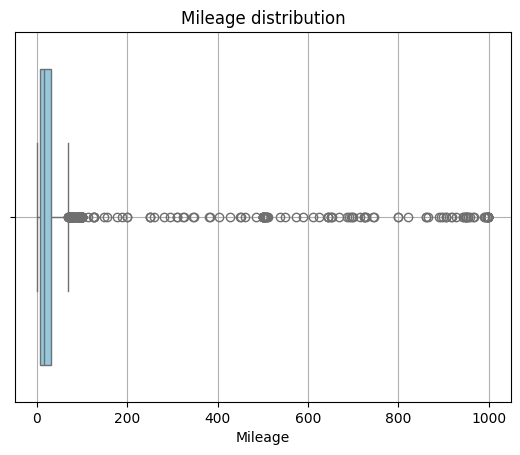

In [8]:
# Mileage distribution

sns.boxplot(x=df["Mileage"], color='skyblue')
plt.title('Mileage distribution')
plt.grid(True)
plt.show()

We can see a lot of outliers.

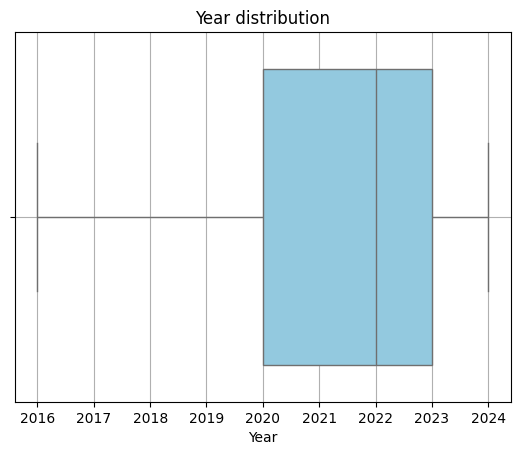

In [9]:
# Year distribution

sns.boxplot(x=df["Year"], color='skyblue')
plt.title('Year distribution')
plt.grid(True)
plt.show()

The oldest car is from 2016, and the newst one from the current year. But form the boxplot we can conclude most of the cars are new.

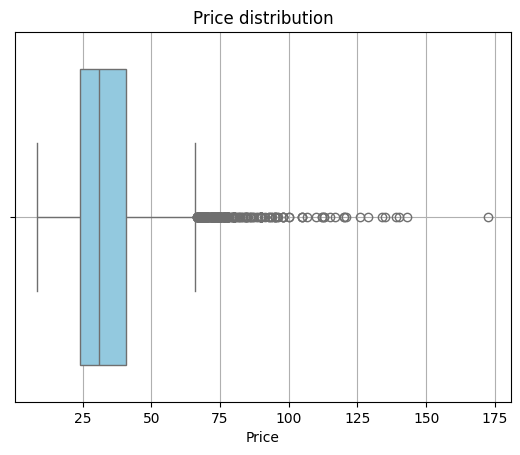

In [10]:
# Price distribution

sns.boxplot(x=df["Price"], color='skyblue')
plt.title('Price distribution')
plt.grid(True)
plt.show()

## Which are the most expensive cars?

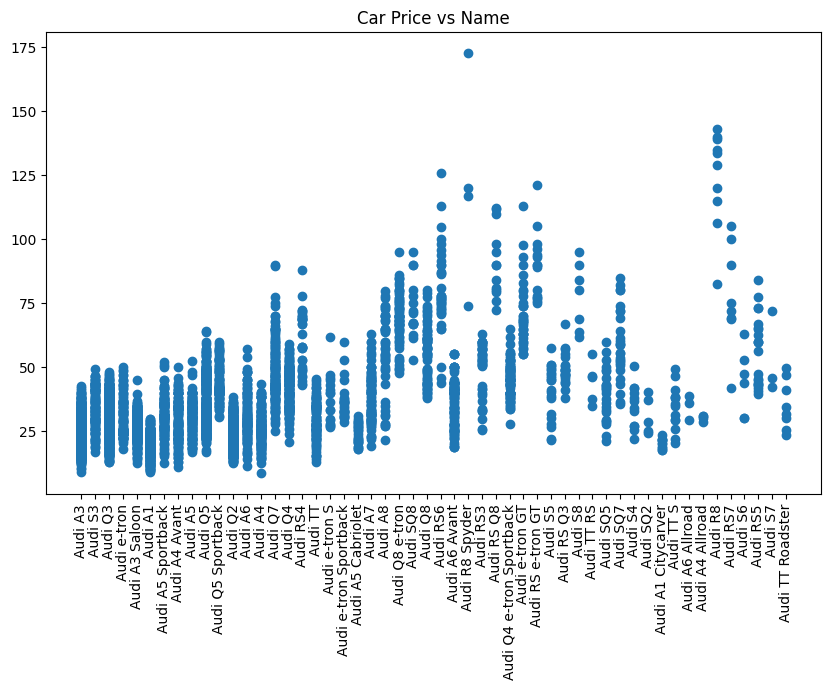

In [11]:
# Create a new figure with a specific size (width: 10 inches, height: 6 inches)
plt.figure(figsize=(10, 6))

# Create a scatter plot with 'Name' on the x-axis and 'Price' on the y-axis
plt.scatter(df['Name'], df['Price'])

# Set the title of the plot
plt.title('Car Price vs Name')

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


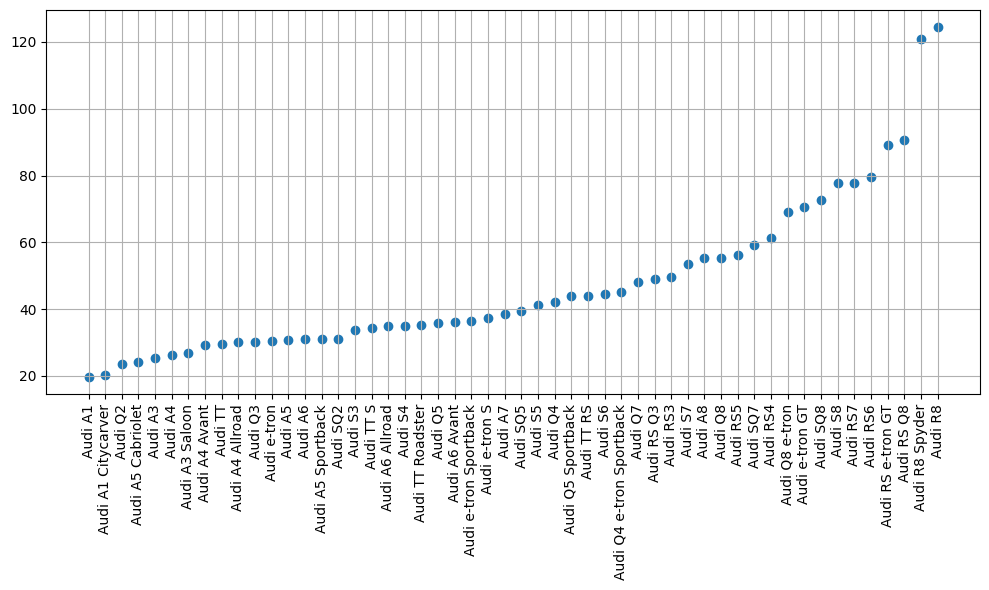

In [12]:
# Calculate the average price of each car make
average_prices = df.groupby('Name')['Price'].mean().reset_index()

# Sort the average prices in ascending order
average_prices = average_prices.sort_values(by='Price')

# Create a new figure for the plot with a specific size
plt.figure(figsize=(10, 6))

# Create a scatter plot with 'Name' on the x-axis and 'Price' on the y-axis
plt.scatter(average_prices['Name'], average_prices['Price'])

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Add grid lines to the plot
plt.grid(True)

# Display the plot
plt.show()


 We can see that the most expensive car is Audi R8, and the cheapest one is Audi A1.

# 2. Data Exploration and Analysis


In this section, we performed the following tasks:



1.   Determined the counts of diesel, hybrid, gas, and electric cars in the dataset.
2.   Analyzed the distribution of mileage across the dataset to understand the range and spread of mileage values.
1.   Explored the relationships between mileage and price, year and price, and condition and price to identify any potential correlations or patterns.
2.   Identified possible outliers, including cars that were priced significantly lower or higher than expected based on their characteristics and market trends.











## Car Types in the dataset

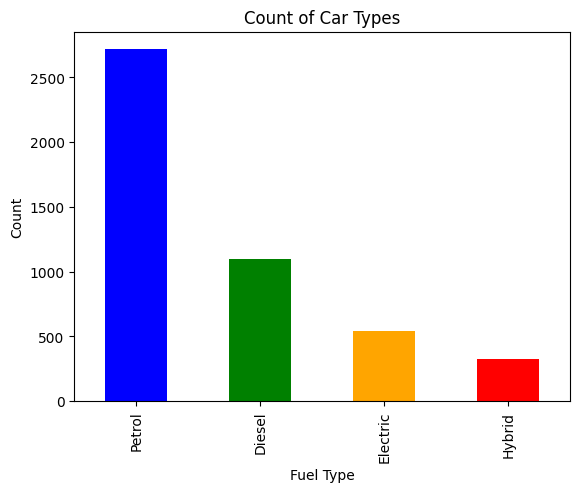

In [13]:
#how many diesel/hybrids/gas/electrical cars we have


# Count the types of cars
car_counts = df['Condition'].value_counts()

# Bar plot
car_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Count of Car Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

The most used car are the Petrol One.

## Mileage distribution by fuel type

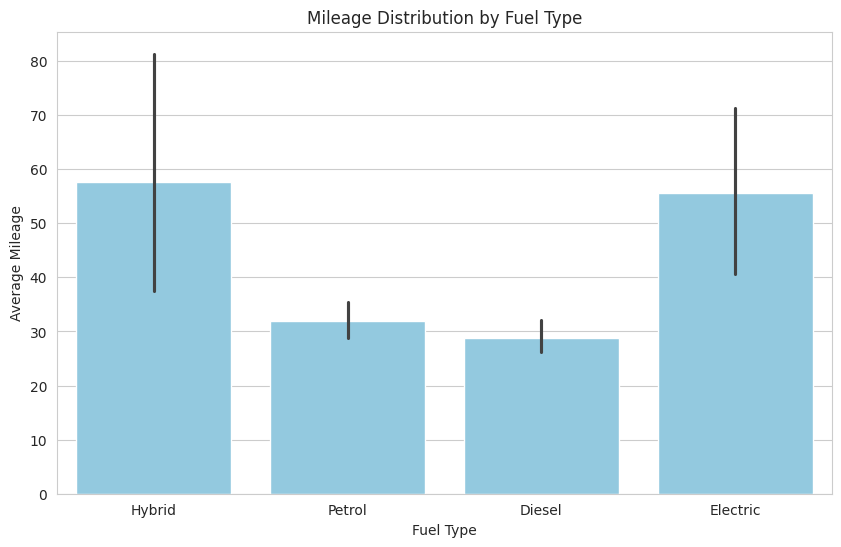

In [14]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot mileage distribution by car type
plt.figure(figsize=(10, 6))
sns.barplot(x='Condition', y='Mileage', data=df, color='skyblue')
plt.title('Mileage Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Mileage')
plt.show()


Data Visualization idea:
1. Variation of Average Car Prices Over Time:
Visualize how car prices have varied over the years to identify trends and fluctuations in pricing trends.



2.   Relationship Between Mileage and Price:
      Explore the relationship between mileage and price to understand how mileage affects car pricing.
3.   Price Distribution by Condition:
Create visualizations to show how prices are distributed across different conditions of cars, such as excellent, good, and fair.

4.   Top-K Most Expensive Cars:
Identify and visualize the top-K most expensive cars in the dataset to understand the pricing distribution and outliers.

5.   Price Trends of Different Fuel Types Over Time:
Examine how the prices of hybrid, petrol, and diesel cars have changed over time to uncover any significant shifts in pricing trends based on fuel type.
















## Average car price over the years

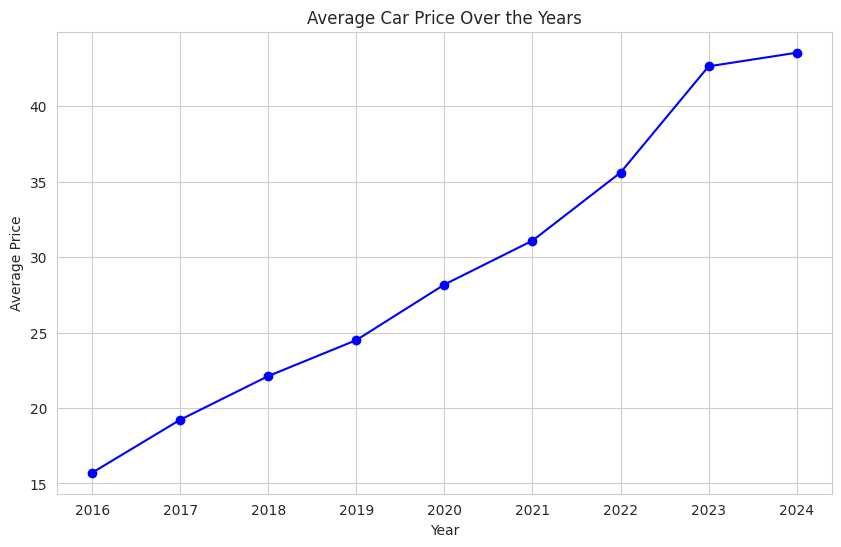

In [15]:
# Grouping data by year and calculating average price
yearly_avg_price = df.groupby('Year')['Price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
yearly_avg_price.plot(marker='o', color='b')
plt.title('Average Car Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

From the Plot, we can conclude the newer cars are the most expensive ones.

## Relationship between features

Trought this plots, we can see the relationships between the features (mileage, price, condition...) in the dataset.

### Mileage and Price relationship

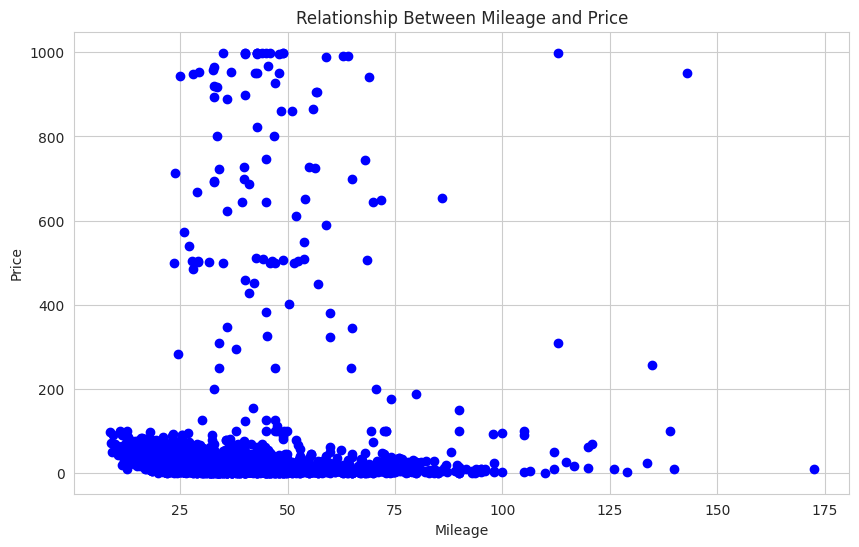

In [16]:
# Create a new figure with a specific size
plt.figure(figsize=(10, 6))

# Create a scatter plot with 'Mileage' on the x-axis and 'Price' on the y-axis
plt.scatter(df['Price'], df['Mileage'], color='b')
plt.title('Relationship Between Mileage and Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.show()


Unexpected correlation between Prica and Mileage features. Usually, cars with higher mileage have the lowest price. But this might be because all cars are basically new.

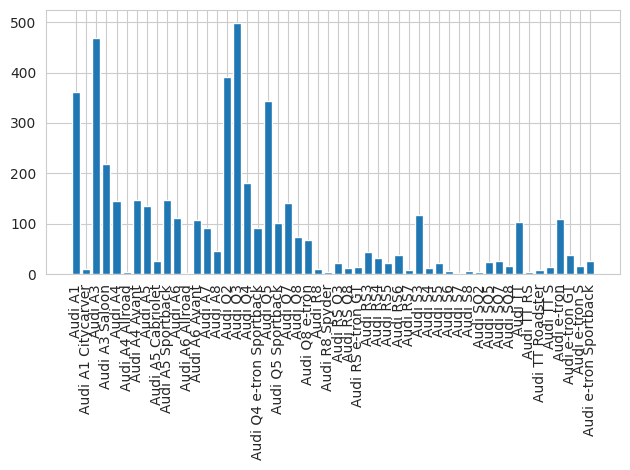

In [17]:
name_counts = df.groupby('Name').size().reset_index(name='Count')
plt.bar(name_counts['Name'], name_counts['Count'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [18]:
print(f'The most frequent car is {name_counts["Name"].value_counts().idxmax()}')

The most frequent car is Audi A1


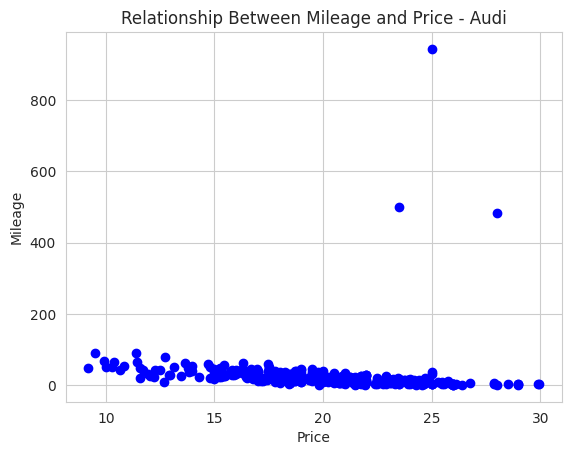

In [19]:
only_a1 =  df[df['Name'] == 'Audi A1']
plt.scatter(only_a1['Price'], only_a1['Mileage'], color='b')
plt.title('Relationship Between Mileage and Price - Audi')
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.grid(True)
plt.show()

When we focused on only one car model, we can see the linear correlation.

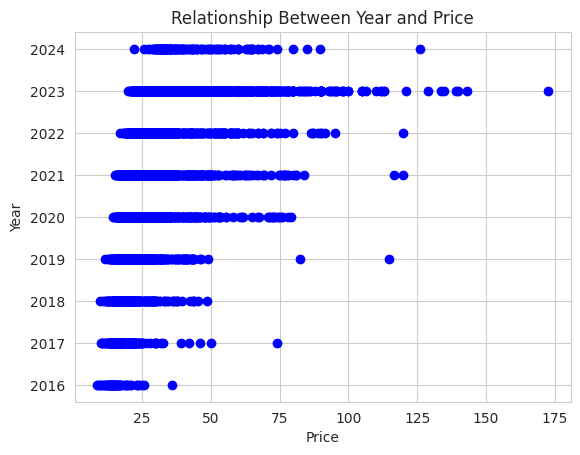

In [20]:
plt.scatter(df['Price'], df['Year'], color='b')
plt.title('Relationship Between Year and Price')
plt.xlabel('Price')
plt.ylabel('Year')
plt.grid(True)
plt.show()

Obvious linear correlation between Price and Year - the older cars are less expensive and vice versa

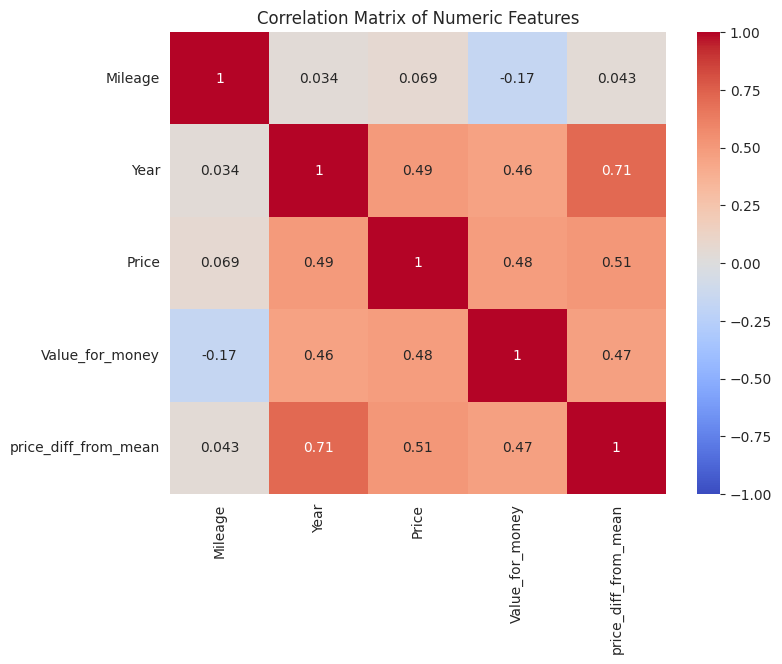

In [29]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


### Price and Condition relationship

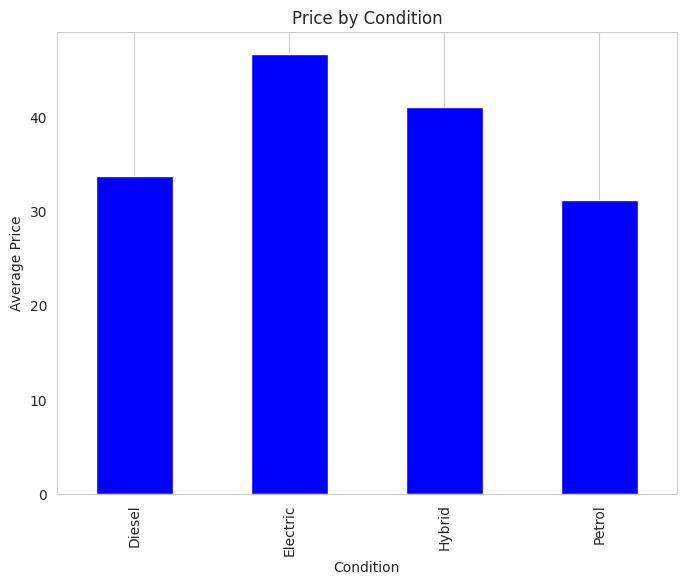

In [23]:
# Create a new figure with a specific size (width: 8 inches, height: 6 inches)
plt.figure(figsize=(8, 6))

# Group the DataFrame by 'Condition' and calculate the mean price for each condition,
# then plot the results as a bar plot
df.groupby('Condition')['Price'].mean().plot(kind='bar', color='b')

# Set the title of the plot
plt.title('Price by Condition')

# Set the label for the x-axis
plt.xlabel('Condition')

# Set the label for the y-axis
plt.ylabel('Average Price')

# Display grid lines along the y-axis
plt.grid(axis='y')

# Display the plot
plt.show()


Electric car present the highest average price, the petrol one are the cheapest.

### Most K expensive car of the dataset

In [24]:
def top_n_expensive_cars(df, n):
    # Sort the DataFrame based on price in descending order
    sorted_df = df.sort_values(by='Price', ascending=False)

    # Select the top N rows
    top_n_cars = sorted_df.head(n)

    return top_n_cars

# Take user input for the number of cars to display
num_cars = int(input("Enter the number of most expensive cars to display: "))

# Display the top N most expensive cars
top_n_cars = top_n_expensive_cars(df, num_cars)
print(top_n_cars)

Enter the number of most expensive cars to display: 6
                Name                                             Type  \
5011  Audi R8 Spyder  5.2 FSI V10 Quattro Performance Ed 2dr S Tronic   
943          Audi R8  5.2 FSI V10 Quattro Performance Ed 2dr S Tronic   
1023         Audi R8  5.2 FSI V10 Quattro Performance Ed 2dr S Tronic   
3825         Audi R8  5.2 FSI V10 Quattro Performance Ed 2dr S Tronic   
3057         Audi R8     5.2 FSI V10 Quattro Performance 2dr S Tronic   
3614         Audi R8  5.2 FSI V10 Quattro Performance Ed 2dr S Tronic   

      Mileage  Year Condition   Price  
5011     10.0  2023    Petrol  172.59  
943     950.0  2023    Petrol  142.99  
1023     10.0  2023    Petrol  139.95  
3825    100.0  2023    Petrol  139.00  
3057    258.0  2023    Petrol  134.95  
3614     25.0  2023    Petrol  133.79  


## Which cars offer the best value for money considering their price and mileage?

To find the cars that offer the best value for money considering their price and mileage, we have calculate a value-for-money metric as the ratio of price to mileage (lower price per unit of mileage indicates better value), then sorting the dataset based on this metric and select the top choices.

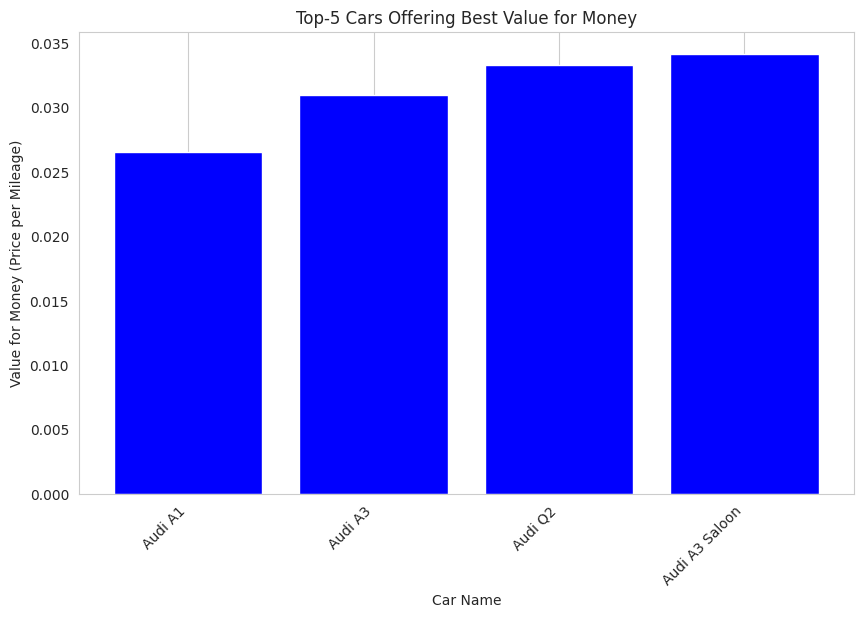

In [25]:
# Calculating value-for-money metric (price per unit of mileage)
df['Value_for_money'] = df['Price'] / df['Mileage']

# Sorting the DataFrame by value-for-money metric in ascending order
df_sorted = df.sort_values(by='Value_for_money', ascending=True)

# Selecting the top-5 cars offering the best value for money
top_value_cars = df_sorted.head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_value_cars['Name'], top_value_cars['Value_for_money'], color='b')
plt.title('Top-5 Cars Offering Best Value for Money')
plt.xlabel('Car Name')
plt.ylabel('Value for Money (Price per Mileage)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

## How have the prices of **hybrid**, **petrol**, and **diesel** cars changed over time?

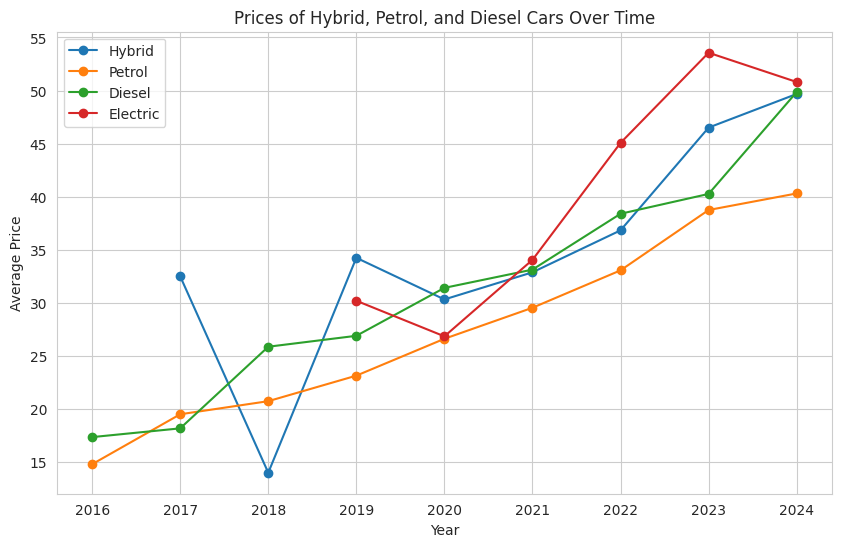

In [26]:
# Grouping data by Year and Fuel_Type and calculating average price
average_prices = df.groupby(['Year', 'Condition'])['Price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each fuel type
for fuel_type in df['Condition'].unique():
    fuel_data = average_prices[average_prices['Condition'] == fuel_type]
    plt.plot(fuel_data['Year'], fuel_data['Price'], marker='o', label=fuel_type)

plt.title('Prices of Hybrid, Petrol, and Diesel Cars Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

# Outliers

The chart displays the price difference of each individual vehicle compared to the average price of vehicles of the same type.

Y-axis: Represents the price difference of each vehicle relative to the average price of its type. Positive values indicate prices higher than the type's average, while negative values indicate prices lower than the type's average.

X-axis: Represents the different types of vehicles in the dataset.

Vertical Bars: Each vertical bar represents a vehicle type. The height of the bar indicates the average price difference for that vehicle type compared to the overall average price. Blue and red bars respectively indicate positive and negative differences.

Dashed Horizontal Line: Positioned at zero on the y-axis, it represents the average price difference for all vehicles. It serves as a reference point to identify vehicles that are above or below their type's average.

Red Points (Outliers): These are the red points that significantly deviate from the average price of their vehicle type. They are considered "outliers," indicating vehicles with a considerably higher or lower price difference compared to the average of their type.

In summary, the chart provides an overview of the price difference among different vehicle types, highlighting outliers that significantly deviate from the average price difference of their vehicle type.

<ipython-input-27-d3eeb8b3daa3>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='price_diff_from_mean', data=df, palette='coolwarm')


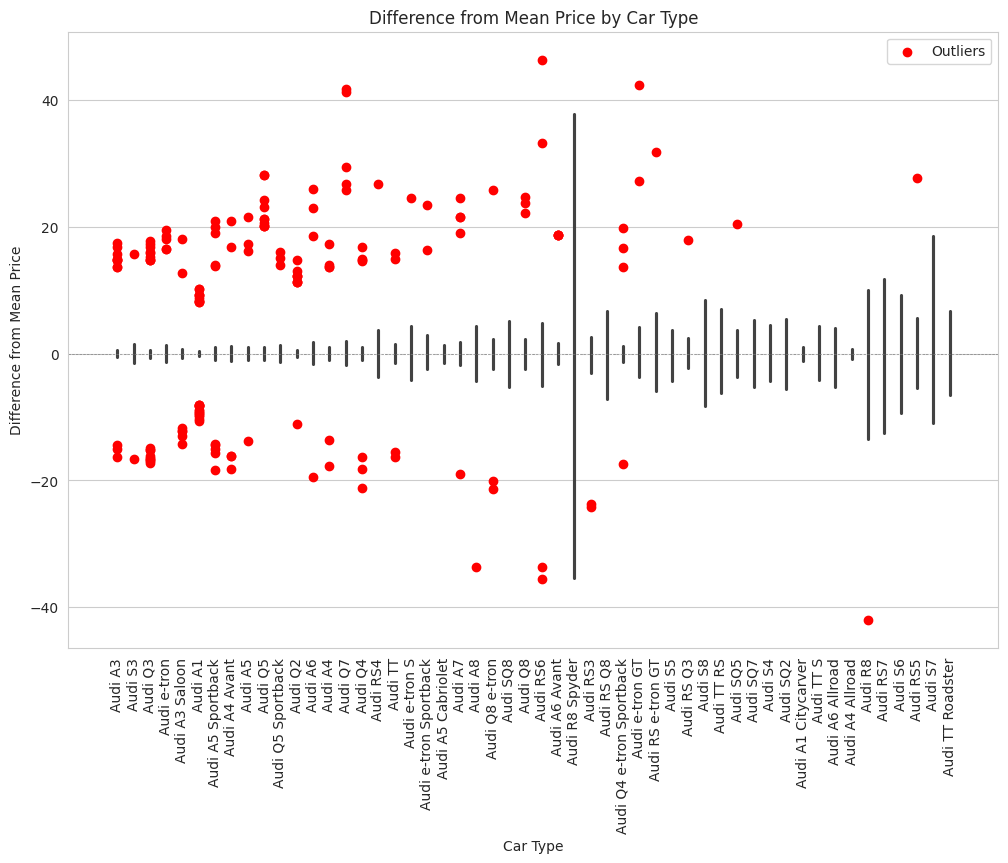

In [27]:
# Calculate the mean prices for each type of vehicle
mean_prices = df.groupby('Name')['Price'].transform('mean')

# Calculate the difference between each vehicle's price and the mean price of its type
df['price_diff_from_mean'] = df['Price'] - mean_prices

# Calculate the standard deviation of prices for each type of vehicle
std_prices = df.groupby('Name')['Price'].transform('std')

# Calculate a threshold to identify outliers
threshold = 2  # For example, we might consider as outliers all vehicles whose price differs from the mean by more than 200% of the standard deviation

# Identify outliers
outliers = df[(df['price_diff_from_mean'] > threshold * std_prices) | (df['price_diff_from_mean'] < -threshold * std_prices)]

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Name', y='price_diff_from_mean', data=df, palette='coolwarm')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Add a horizontal line at 0 to highlight the mean
plt.scatter(outliers['Name'], outliers['price_diff_from_mean'], color='red', label='Outliers', zorder=5)  # Highlight the outliers
plt.title('Difference from Mean Price by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Difference from Mean Price')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Dynamic filtering

 The dynamic filtering allows users to **interactively explore a dataset**, in this case by selecting specific criteria such as brand, fuel type, year range, and price range. *Dropdown menus* and *sliders* are used as interactive tools for filtering the data. When users make selections, the dataset is filtered accordingly, and the filtered results are displayed below the interface in real-time.

In [28]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Create dropdown widgets for filtering
brand_dropdown = widgets.Dropdown(options=['All'] + df['Name'].unique().tolist(), description='Brand:')
fuel_type_dropdown = widgets.Dropdown(options=['All'] + df['Condition'].unique().tolist(), description='Fuel Type:')
year_slider = widgets.IntRangeSlider(min=df['Year'].min(), max=df['Year'].max(),
                                     value=(df['Year'].min(), df['Year'].max()), description='Year Range:')
price_slider = widgets.FloatRangeSlider(min=df['Price'].min(), max=df['Price'].max(),
                                        value=(df['Price'].min(), df['Price'].max()), description='Price Range:')

# Define filtering function
def filter_data(brand, fuel_type, year_range, price_range):
    filtered_df = df.copy()
    if brand != 'All':
        filtered_df = filtered_df[filtered_df['Name'] == brand]
    if fuel_type != 'All':
        filtered_df = filtered_df[filtered_df['Condition'] == fuel_type]
    filtered_df = filtered_df[(filtered_df['Year'] >= year_range[0]) & (filtered_df['Year'] <= year_range[1])]
    filtered_df = filtered_df[(filtered_df['Price'] >= price_range[0]) & (filtered_df['Price'] <= price_range[1])]
    return filtered_df

# Define function to update output
def update_output(change):
    filtered_df = filter_data(brand_dropdown.value, fuel_type_dropdown.value,
                               year_slider.value, price_slider.value)
    with output:
        output.clear_output()
        display(filtered_df)

# Display widgets
brand_dropdown.observe(update_output, 'value')
fuel_type_dropdown.observe(update_output, 'value')
year_slider.observe(update_output, 'value')
price_slider.observe(update_output, 'value')

# Display output
output = widgets.Output()
display(widgets.VBox([brand_dropdown, fuel_type_dropdown, year_slider, price_slider, output]))